# Agregace

- Základní agregace za pomocí metod agg() a aggregate(), kdy lze použít více agregačních metod najednou, viz https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.agg.html a https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.aggregate.html

- Kumulované agregace za pomocí metod cummax(), cummin(), cumsum() apod. viz např.  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cummax.html

- Klouzavé agregace za pomoci metody rolling(), viz https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html#pandas-series-rolling


In [3]:
# Import potrebnych knihoven
import pandas as pd
from matplotlib import pyplot as plt 


# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df[df['NAME']=='RUZYNE']
# Vyber jednoho sloupce z dataframe do promenne srazky, ktera ma typ pandas.core.series.Series
srazky = df['PRCP']
srazky = srazky.set_axis(df['DATE'])
srazky_2020 = srazky.filter(like='2020')

# Agreagace Series metodami min, max, mean
agregace = srazky_2020.agg(['min','max','mean'])
print(agregace)



min      0.000000
max     58.200000
mean     1.725868
Name: PRCP, dtype: float64


([], [])

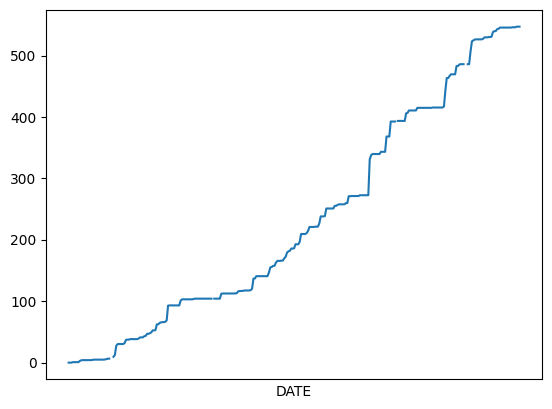

In [4]:
# Vytvoreni Series s kumulativnimi srazkami v roce 2020
srazky_2020_kumulativne = srazky_2020.cumsum()

srazky_2020_kumulativne.plot.line()
plt.xticks([])

([], [])

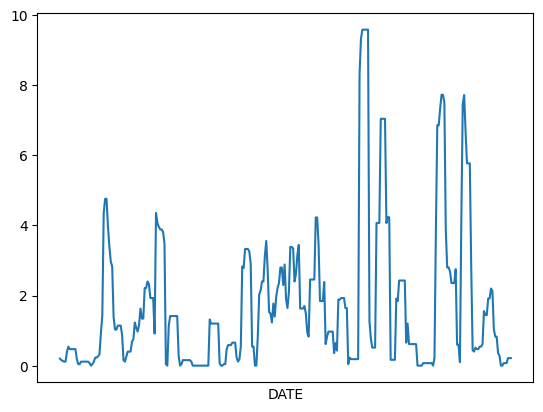

In [7]:
# Prumer srazek za klouzave obdobi 7 dnu
srazky_klouzave_obdobi = srazky_2020.rolling(window=7,min_periods=4).mean()
srazky_klouzave_obdobi.plot.line()
plt.xticks([])





([], [])

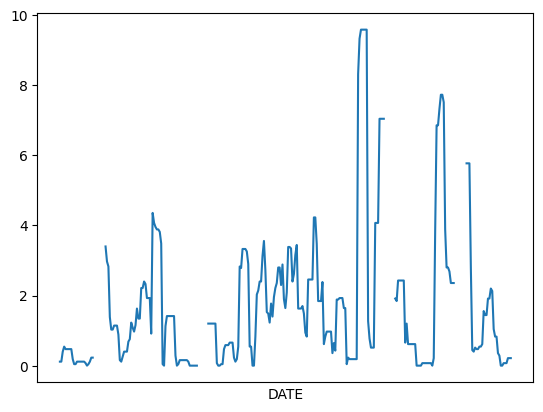

In [10]:
# Prevod textovych hodnot indexu na datovy typ datetime
srazky_2020_klouzave = srazky_2020.copy()
srazky_2020_klouzave.index = pd.to_datetime(srazky_2020_klouzave.index)

# Vypocet prumeru (mean) za obdobi klouzavych 30 dnu
srazky_klouzave_obdobi = srazky_2020.rolling(30).mean()
graf = srazky_klouzave_obdobi.plot.line()
plt.xticks([])


## Shlukování hodnot pomocí metody groupby()

- Metoda groupby() slouží ke shlukování dat, viz https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html

In [17]:
srazky_2020_groupby = srazky_2020.copy()


srazky_2020_groupby.index = pd.to_datetime(srazky_2020_groupby.index).month
srazky_2020_groupby.groupby(by='DATE').sum()




DATE
1       6.5
2      42.7
3      55.0
4       8.7
5      52.8
6      72.4
7      34.5
8     138.0
9      58.9
10     70.3
11      7.3
Name: PRCP, dtype: float64

In [18]:

srazky_2020_groupby = srazky_2020.copy()
srazky_2020_groupby.index  = pd.to_datetime(srazky_2020_groupby.index).month
# Nize vznika dataframe, tj. nejedna se jiz o series
srazky_2020_groupby.groupby(by='DATE').agg(['sum','max'])


sum   max
DATE             
1       6.5   2.0
2      42.7  15.2
3      55.0  24.1
4       8.7   7.9
5      52.8  16.5
6      72.4  12.7
7      34.5  12.4
8     138.0  58.2
9      58.9  25.4
10     70.3  20.8
11      7.3   3.3

## Cvičení

### Cvičení data

In [ ]:
# Import potrebnych knihoven
import pandas as pd
import numpy as np

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter = ';')
# Filtrovani dataframe (je vysvetleno pozdeji)
df = df[df['NAME']=='RUZYNE']
# Vyber jednoho sloupce z dataframe do promenne srazky, ktera ma typ pandas.core.series.Series
dest = df['PRCP']
dest = dest.set_axis(df['DATE'])

### Cvičení zadání

V proměnné dest je uložena pd.Series

1. Vytvořte si kopii proměnné dest, tu pojmenujte dest_kumulativne a zbavte NaN hodnot
2. Do proměnné dest_kumulativne spočítejte kumulativní součet hodnot Series
3. Do proměnné dest_data_2010 spočítejte sumu, mean a maximum ze Series, jejíž štítek (index) obsahuje 2010
4. Do proměnné dest_data_klouzave spočítejte sumu srážek za klouzavé období 5 dnů,  minimální počet hodnot 1

Bonus:

5. Vytvořte si kopii Series dest, kopii pojmenujte dest_datumy
6. Za pomoci metody pd.to_datetime() změňte datový typ indexu (štítku) Series dest_datumy na datum
7. Nahraďte hodnoty na štítku (indexu) atributem .year konkrétního štítku (indexu)
8. Agregujte Series dest_datumy podle indexu, agregační funkce je suma

